<a href="https://colab.research.google.com/github/evelyndick/lake_district_temp/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas xlrd   # install pandas and xlrd libraries

In [ ]:
# import necessary libraries
import pandas as pd                   # pandas: provides data structures and data analysis tools
import seaborn as sns                 # seaborn: built on top of matplotlib, provides statistical graphics
import numpy as np                    # numpy: used for numerical operations on large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt       # matplotlib.pyplot: used for creating visualisations

In [ ]:
# load the excel file into a dataframe and remove the 'OBJECTID' column
df = pd.read_excel('temp_covariates_df.xls').drop('OBJECTID', axis=1)
# inspect
df

,air_temperature,lat,long,station,season,month,year,gdft,hurs,psl,pv,rain,wind,snow,sun,landcover,dem,hlsd,slope
0,5.38,54.259,-2.777,5,1,12,2022,20.784102,89.713809,1009.354037,6.971894,154.708096,2.792963,0.134040,66.011790,142,8.811590,215,250
1,5.25,54.259,-2.777,5,1,12,2022,20.784102,89.713809,1009.354037,6.971894,154.708096,2.792963,0.134040,66.011790,142,8.811590,215,250
2,3.52,54.259,-2.777,5,1,12,2022,20.784102,89.713809,1009.354037,6.971894,154.708096,2.792963,0.134040,66.011790,142,8.811590,215,250
3,5.13,54.259,-2.777,5,1,12,2022,20.784102,89.713809,1009.354037,6.971894,154.708096,2.792963,0.134040,66.011790,142,8.811590,215,250
4,5.32,54.259,-2.777,5,1,12,2022,20.784102,89.713809,1009.354037,6.971894,154.708096,2.792963,0.134040,66.011790,142,8.811590,215,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18787,1.99,54.572,-2.412,13,1,1,2019,15.930754,86.148247,1016.307746,6.838736,33.465914,3.073563,5.268966,59.876764,321,223.180099,221,250
18788,-0.53,54.572,-2.412,13,1,1,2019,15.930754,86.148247,1016.307746,6.838736,33.465914,3.073563,5.268966,59.876764,321,223.180099,221,250
18789,0.23,54.572,-2.412,13,1,1,2019,15.930754,86.148247,1016.307746,6.838736,33.465914,3.073563,5.268966,59.876764,321,223.180099,221,250
18790,-2.12,54.572,-2.412,13,1,1,2019,15.930754,86.148247,1016.307746,6.838736,33.465914,3.073563,5.268966,59.876764,321,223.180099,221,250


In [ ]:
# group df by 'season' and calculate aggregate statistics
season_stats = df.groupby(['season'])['air_temperature'].agg(

    # calculate the mean air temperature for each season
    mean='mean',

    # calculate the median air temperature for each season
    median='median',

    # calculate the minimum air temperature for each season
    min=lambda x: x.min(),

    # calculate the maximum air temperature for each season
    max=lambda x: x.max(),

).reset_index()

# display the statistics
season_stats

,season,mean,median,min,max
0,1,4.342818,4.91,-7.67,13.13
1,2,7.942942,7.90,-5.44,21.50
2,3,14.652296,14.70,2.01,26.95
3,4,9.856554,10.12,-4.82,23.50


# Table 6.1 - Seasonal Air Temperature’s Mean, Median and Range.

In [ ]:
# group df by 'year' and 'season' and calculate aggregate statistics
yearly_season_stats = df.groupby(['year', 'season'])['air_temperature'].agg(

    # calculate the mean air temperature for each year and season
    mean='mean',

    # calculate the median air temperature for each year and season
    median='median',

    # calculate the minimum air temperature for each year and season
    min=lambda x: x.min(),

    # calculate the maximum air temperature for each year and season
    max=lambda x: x.max(),

).reset_index()

# round the stats to 2 decimal places
yearly_season_stats = yearly_season_stats.round(2)

# create a new column 'range' that combines minimum and maximum temperatures in a string format
yearly_season_stats['range'] = yearly_season_stats['min'].astype(str) + ' - ' + yearly_season_stats['max'].astype(str)

# drop minimum and maximum columns
yearly_season_stats = yearly_season_stats.drop(['min', 'max'], axis=1)

# map the numberical season values to their corresponding names
season_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'autumn'}
yearly_season_stats['season'] = yearly_season_stats['season'].map(season_mapping)

# display the statistics
yearly_season_stats

,year,season,mean,median,range
0,2019,winter,4.75,5.21,-7.0 - 13.13
1,2019,spring,8.09,7.80,-2.87 - 17.9
2,2019,summer,14.63,14.80,3.77 - 25.9
3,2019,autumn,8.56,9.00,-4.3 - 17.69
4,2020,winter,4.79,5.20,-4.9 - 12.04
5,2020,spring,8.29,8.07,-3.6 - 21.5
6,2020,summer,14.06,13.90,2.01 - 25.0
7,2020,autumn,9.57,9.48,-0.87 - 21.3
8,2021,winter,3.55,3.78,-7.3 - 12.73
9,2021,spring,6.81,6.81,-5.44 - 18.4


#  Figure 6.1. Monthly average air temperatures time-series.

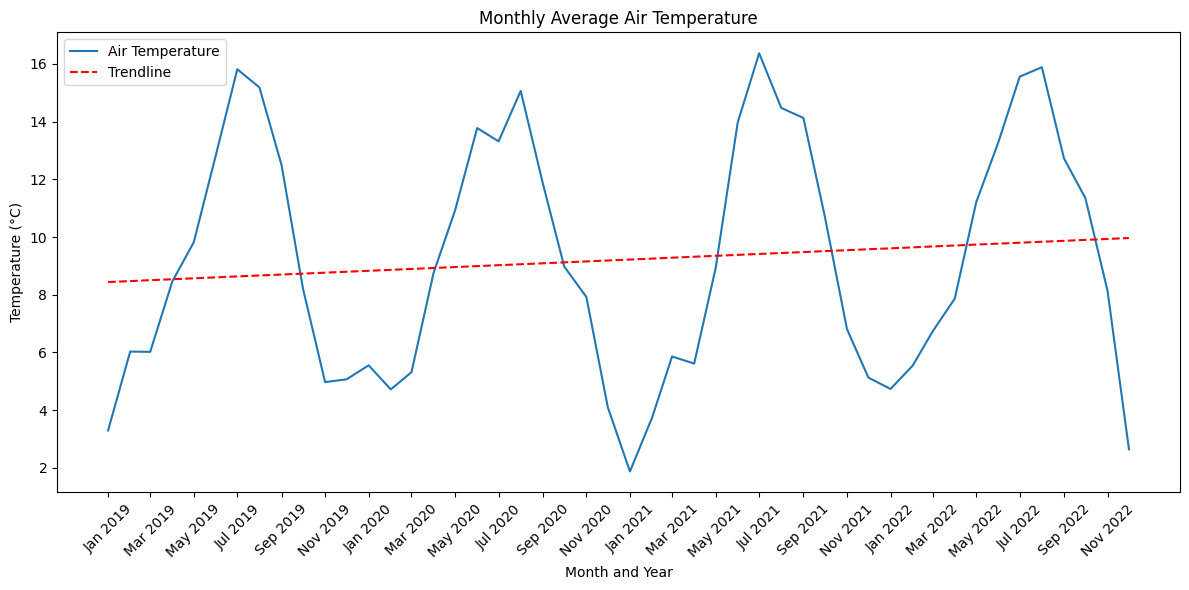

In [ ]:
# group df by 'year' and 'month' and calculate the mean air temperature to create df monthly_avg_temp
monthly_avg_temp = df.groupby(['year', 'month'])['air_temperature'].mean().reset_index()

# combine 'year' and 'month' columns into a single datetime column named 'date'
monthly_avg_temp['date'] = pd.to_datetime(monthly_avg_temp['year'].astype(str) + '-' + monthly_avg_temp['month'].astype(str))

# set 'date' as the index
monthly_avg_temp.set_index('date', inplace=True)

# set figure size to 12x6
plt.figure(figsize=(12, 6))

# plot the monthly average air temeprature
plt.plot(monthly_avg_temp.index, monthly_avg_temp['air_temperature'], label='Air Temperature')

# fit a trendline
x = np.arange(len(monthly_avg_temp))
y = monthly_avg_temp['air_temperature']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(monthly_avg_temp.index, p(x), "r--", label='Trendline')

# customise the x-axis to show every 2nd month for better readability
ticks_to_use = monthly_avg_temp.index[::2]
plt.xticks(ticks_to_use, ticks_to_use.strftime('%b %Y'), rotation=45)

# add title and labels
plt.title('Monthly Average Air Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month and Year')

# add legend
plt.legend()
# adjust the layout
plt.tight_layout()
# display
plt.show()

#  Figure 6.2. Scatter plots of co-variates with air temperature.

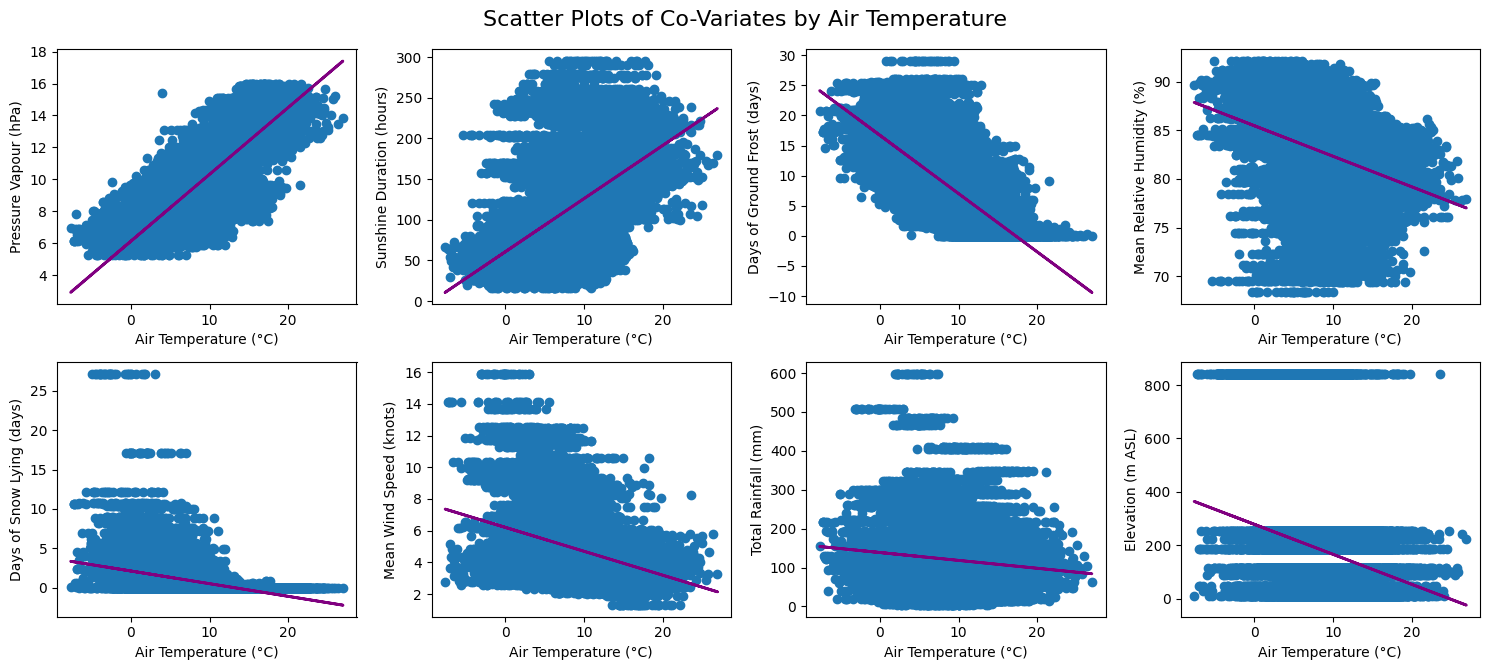

In [ ]:
# set figure size to 15x7 with a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(15, 7))

# rename the covariates to plot
covariates = [
    ("pv", "Pressure Vapour (hPa)"),
    ("sun", "Sunshine Duration (hours)"),
    ("gdft", "Days of Ground Frost (days)"),
    ("hurs", "Mean Relative Humidity (%)"),
    ("snow", "Days of Snow Lying (days)"),
    ("wind", "Mean Wind Speed (knots)"),
    ("rain", "Total Rainfall (mm)"),
    ("dem", "Elevation (m ASL)"),
]

# flatten the axis
axes = axes.flatten()

# loop for each subplot axis and covariate
for ax, (column, ylabel) in zip(axes, covariates):
    # extract air temperature value (x) and the covariate data (y) from df
    x = df["air_temperature"]
    y = df[column]

    # create a scatter plot
    ax.scatter(x, y, marker="o")
    # add label
    ax.set_xlabel("Air Temperature (°C)")
    ax.set_ylabel(ylabel)

    # fit a linear trendline
    slope, intercept = np.polyfit(x, y, 1)
    trend_line = slope * x + intercept
    ax.plot(x, trend_line, color='purple', linestyle='-', linewidth=2)

# adjust layout with a top margin for title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# add title
plt.suptitle('Scatter Plots of Co-Variates by Air Temperature', fontsize=16)
# display
plt.show()

#  Figure 6.3. Pearson correlation between variables.

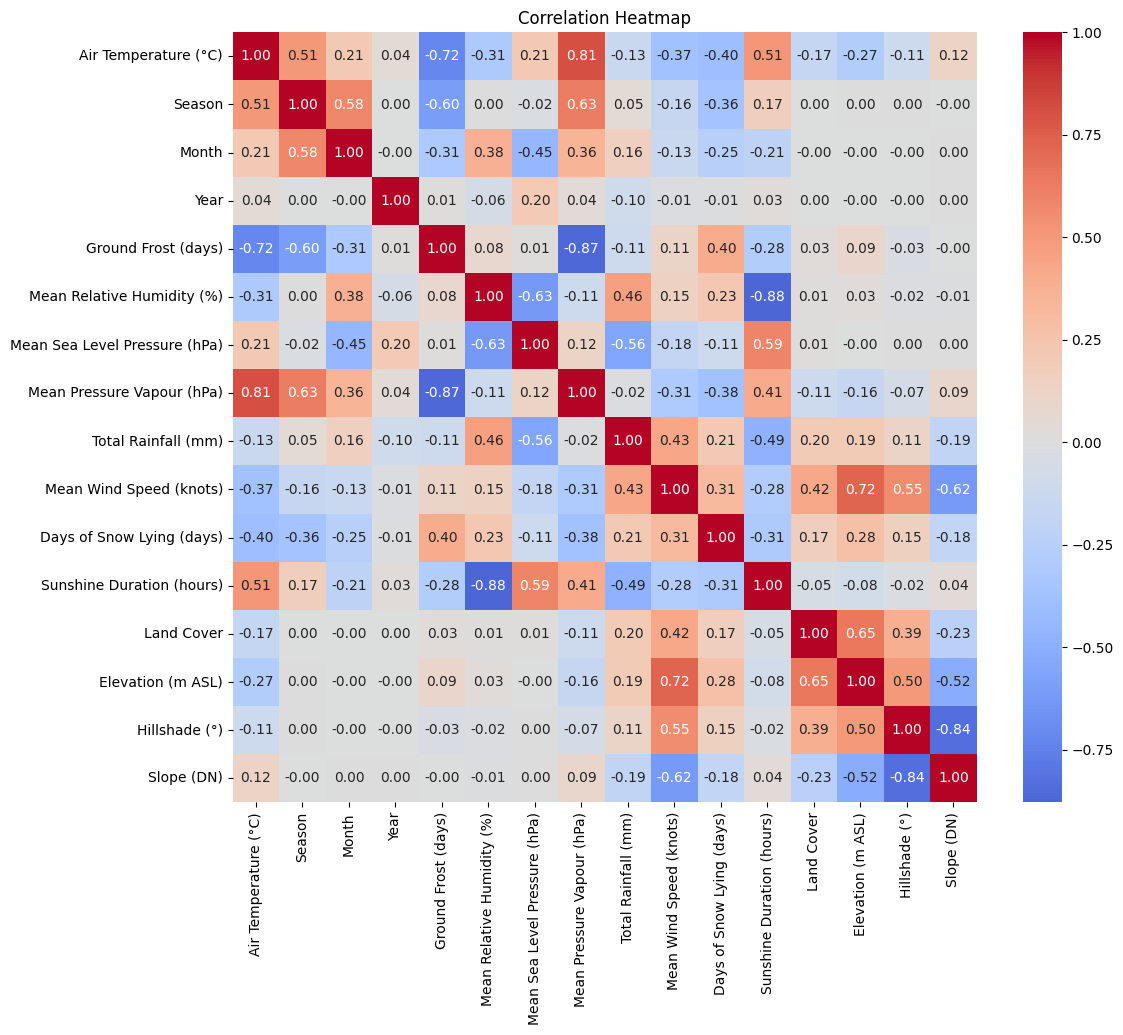

In [ ]:
# drop columns 'lat', 'long' and 'station' to create dataframe corr_df
corr_df = df.drop(['lat','long','station'], axis=1)

# calculate the correlation matrix for corr_df
correlation_matrix = corr_df.corr()

# rename the covariates to plot
covariates = {
    'air_temperature': 'Air Temperature (°C)',
    'season': 'Season',
    'month': 'Month',
    'year': 'Year',
    'gdft': 'Ground Frost (days)',
    'hurs': 'Mean Relative Humidity (%)',
    'psl': 'Mean Sea Level Pressure (hPa)',
    'pv': 'Mean Pressure Vapour (hPa)',
    'rain': 'Total Rainfall (mm)',
    'wind': 'Mean Wind Speed (knots)',
    'snow': 'Days of Snow Lying (days)',
    'sun': 'Sunshine Duration (hours)',
    'landcover': 'Land Cover',
    'dem': 'Elevation (m ASL)',
    'hlsd': 'Hillshade (°)',
    'slope': 'Slope (DN)'
}
# rename columns
correlation_matrix = correlation_matrix.rename(columns=covariates, index=covariates)

# set figure size to 12x10
plt.figure(figsize=(12, 10))
# generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
# add title
plt.title('Correlation Heatmap')
# display
plt.show()

# Figure 6.4 - Distribution of the four seasons by air temperature and vapour pressure.

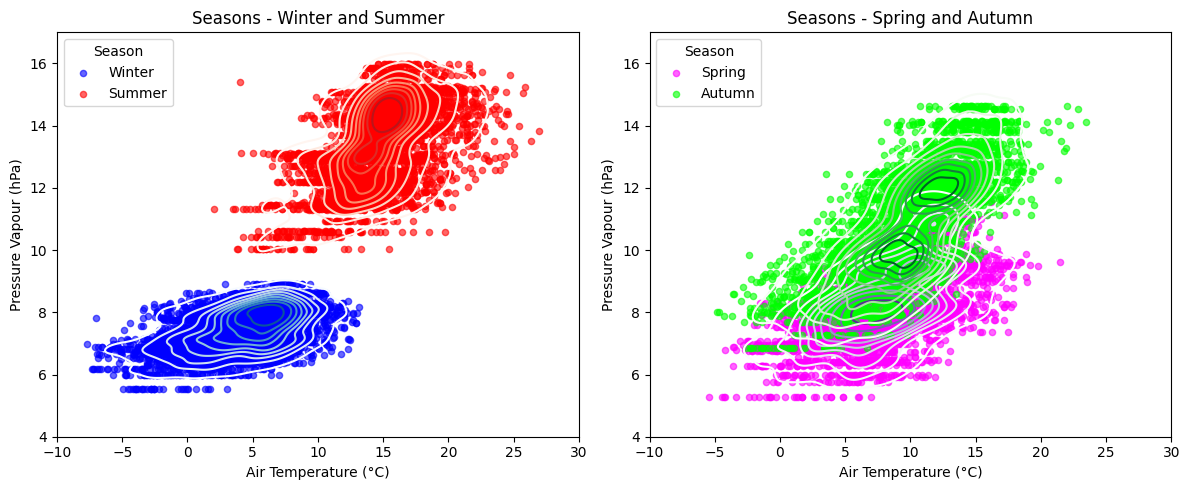

In [ ]:
# filter dataframe df to create seperate dataframes for each season
winter = df[df['season'] == 1]
spring = df[df['season'] == 2]
summer = df[df['season'] == 3]
autumn = df[df['season'] == 4]

# extract values from the season and convert into an array
C = np.array(df.season)

# find the indices of rows where the season is winter (1), spring (2), summer (3) and autumn (4)
i1 = np.ravel(np.argwhere(C == 1))
i2 = np.ravel(np.argwhere(C == 2))
i3 = np.ravel(np.argwhere(C == 3))
i4 = np.ravel(np.argwhere(C == 4))

# extract air temperature and pressure vapour columns as NumPy arrays
AT = np.array(df.air_temperature.values)
PV = np.array(df.pv.values)

# define limits for the x-axis and y-axis
x_min = -10
x_max = 30
y_min = 4
y_max = 17

# create a figure with two subplots side by side
plt.figure(figsize=(12, 5))

# first subplot: scatter plots and KDE for winter and summer
plt.subplot(1, 2, 1)
# scatter plot for winter with blue colour
plt.scatter(x=AT[i1], y=PV[i1], marker="o", c=[[0, 0, 1]], s=20, alpha=0.6, label='Winter')
sns.kdeplot(x=AT[i1], y=PV[i1], cmap="Blues")
# scatter plot for summer with red colour
plt.scatter(x=AT[i3], y=PV[i3], marker="o", c=[[1, 0, 0]], s=20, alpha=0.6, label='Summer')
sns.kdeplot(x=AT[i3], y=PV[i3], cmap="Reds")
# label axis
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Pressure Vapour (hPa)")
# set limits for the x-axis and y-axis
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
# add legend
plt.legend(loc='upper left', title="Season", markerscale=1, fontsize=10)
# add title
plt.title('Seasons - Winter and Summer')

# second subplot: scatter plots and KDE for spring and autumn
plt.subplot(1, 2, 2)
# scatter plot for spring with purple colour
plt.scatter(x=AT[i2], y=PV[i2], marker="o", c=[[1, 0, 1]], s=20, alpha=0.6, label='Spring')
sns.kdeplot(x=AT[i2], y=PV[i2], cmap="Purples")
# scatter plot for autumn with green colour
plt.scatter(x=AT[i4], y=PV[i4], marker="o", c=[[0, 1, 0]], s=20, alpha=0.6, label='Autumn')
sns.kdeplot(x=AT[i4], y=PV[i4], cmap="Greens")
# label axis
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Pressure Vapour (hPa)")
# set limits for the x-axis and y-axis
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
# add legend
plt.legend(loc='upper left', title="Season", markerscale=1, fontsize=10)
# add title
plt.title('Seasons - Spring and Autumn')

# adjust the layout
plt.tight_layout()
# display
plt.show()